In [1]:
# https://towardsdatascience.com/multi-class-text-classification-with-lstm-1590bee1bd17

import pandas as pd
df = pd.read_csv('Scrapper/final.csv', header=None)
df.rename(columns={0: 'comment', 1: 'category'}, inplace=True)

In [2]:
# df.head()
df.category.unique()

array(['positive', 'imperative', 'interrogative', 'other', 'correction',
       'negative'], dtype=object)

In [3]:
df['category_id'] = df['category'].factorize()[0]
df.head()

,comment,category,category_id
0,Love you sir!!,positive,0
1,Please make videos on..Midpoint circle drawing...,imperative,1
2,I bought both of your courses on Udemy. You ar...,interrogative,2
3,"Thank you very much, u really got me in the fi...",positive,0
4,i hope u are ok with everything going on again...,other,3


In [4]:
print(df[df.isna().any(axis=1)])

Empty DataFrame
Columns: [comment, category, category_id]
Index: []


In [5]:
# preprocessing
import re

# lowercasing
df['comment'] = df['comment'].str.lower()

# removing urls
df['comment'] = df['comment'].str.replace('http\S+|www.\S+', '', case=False)

# removing commas "\n"
df['comment'] = df['comment'].replace('\n','', regex=True)

# removing all the punctuations
df["comment"] = df['comment'].str.replace('[^\w\s]','')

# removing integers
df['comment'] = df['comment'].replace('\d','', regex=True)

# removing emojis
df['comment'] = df['comment'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
df

,comment,category,category_id
0,love you sir,positive,0
1,please make videos onmidpoint circle drawing a...,imperative,1
2,i bought both of your courses on udemy you are...,interrogative,2
3,thank you very much u really got me in the fir...,positive,0
4,i hope u are ok with everything going on again...,other,3
...,...,...,...
1704,tanx for de tutorialsvry helpfull,positive,0
1705,you could be little fast,imperative,1
1706,really appreciate your work its the best tutor...,positive,0
1707,thanks for this wonderful presentation have ca...,interrogative,2


In [6]:
# # correcting the typos
# from autocorrect import Speller

# spell = Speller(lang='en')

# def typo_corrector(text):
#     return spell(text)

# df['comment'] = df['comment'].apply(typo_corrector)
# df

In [8]:
# # stemming
import nltk

# stemmer = nltk.stem.SnowballStemmer('english')
# def stem_text(text):
#     return stemmer.stem(text)

# df['comment'] = df['comment'].apply(stem_text)


# lemmatizing
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return lemmatizer.lemmatize(text)

df['comment'] = df['comment'].apply(lemmatize_text)
df

,comment,category,category_id
0,love you sir,positive,0
1,please make videos onmidpoint circle drawing a...,imperative,1
2,i bought both of your courses on udemy you are...,interrogative,2
3,thank you very much u really got me in the fir...,positive,0
4,i hope u are ok with everything going on again...,other,3
...,...,...,...
1704,tanx for de tutorialsvry helpfull,positive,0
1705,you could be little fast,imperative,1
1706,really appreciate your work its the best tutor...,positive,0
1707,thanks for this wonderful presentation have ca...,interrogative,2


In [10]:
# Removing stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')

# These are the words that should not be removed from their category
negative_words = ['no','not']
interrogative_words = ['how','what','which','who','whom','why','do','does','is','are','was','were','will','am',
                      'are','could','would','should','can','did','does','do','had','have']
imperative_words = ['could','would','should','can']

for_negative_category = stop.copy()
for word in negative_words:
    if word in for_negative_category:
        for_negative_category.remove(word)
    
for_interrogative_category = stop.copy()
for word in interrogative_words:
    if word in for_interrogative_category:
        for_interrogative_category.remove(word)
    
for_imperative_category = stop.copy()
for word in imperative_words:
    if word in for_imperative_category:
        for_imperative_category.remove(word)

# For negative category
for i in range(len(df)):
    if df['category'][i] == "negative":
        df['comment'][i] = ' '.join([word for word in df['comment'][i].split() if word not in for_negative_category])

# For interrogative category
for i in range(len(df)):
    if df['category'][i] == "interrogative":
        df['comment'][i] = ' '.join([word for word in df['comment'][i].split() if word not in for_interrogative_category])
        
# For interrogative category
for i in range(len(df)):
    if df['category'][i] == "imperative":
        df['comment'][i] = ' '.join([word for word in df['comment'][i].split() if word not in for_imperative_category])
        
# For all other category
for i in range(len(df)):
    if df['category'][i] == "positive" or df['category'][i] == "correction" or df['category'][i] == "other":
        df['comment'][i] = ' '.join([word for word in df['comment'][i].split() if word not in stop])

# df[0] = df[0].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# df

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rhitabratpokharel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/Volumes/MyFiles/Projects/Youtube-Comments-Categorization/venv/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Volumes/MyFiles/Projects/Youtube-Comments-Categorization/venv/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Volumes/MyFiles/Projects/Youtube-Comments-Categorization/venv/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value 

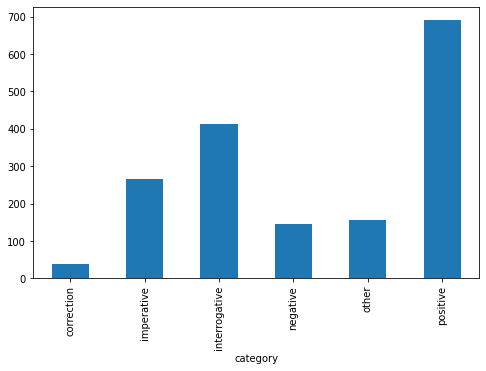

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,5))
df.groupby('category').comment.count().plot.bar(ylim=0)
plt.show()

In [12]:
from keras.preprocessing.text import Tokenizer

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['comment'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Using TensorFlow backend.


Found 3282 unique tokens.


In [13]:
from keras.preprocessing.sequence import pad_sequences

X = tokenizer.texts_to_sequences(df['comment'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (1709, 250)


In [14]:
Y = pd.get_dummies(df['category']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (1709, 6)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1538, 250) (1538, 6)
(171, 250) (171, 6)


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 606       
Total params: 5,081,006
Trainable params: 5,081,006
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
from keras.callbacks import EarlyStopping
# from keras.layers import Dropout

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


/Volumes/MyFiles/Projects/Youtube-Comments-Categorization/venv/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1384 samples, validate on 154 samples
Epoch 1/5
1384/1384 [==============================] - 8s 6ms/step - loss: 1.6050 - accuracy: 0.4046 - val_loss: 1.4820 - val_accuracy: 0.4545
Epoch 2/5
1384/1384 [==============================] - 7s 5ms/step - loss: 1.4070 - accuracy: 0.4711 - val_loss: 1.3247 - val_accuracy: 0.5065
Epoch 3/5
1384/1384 [==============================] - 7s 5ms/step - loss: 1.1868 - accuracy: 0.5744 - val_loss: 1.1547 - val_accuracy: 0.5455
Epoch 4/5
1384/1384 [==============================] - 7s 5ms/step - loss: 0.9275 - accuracy: 0.6445 - val_loss: 0.9715 - val_accuracy: 0.6623
Epoch 5/5
1384/1384 [==============================] - 7s 5ms/step - loss: 0.7102 - accuracy: 0.7753 - val_loss: 0.8610 - val_accuracy: 0.7208


In [18]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

171/171 [==============================] - 0s 1ms/step
Test set
  Loss: 0.835
  Accuracy: 0.678


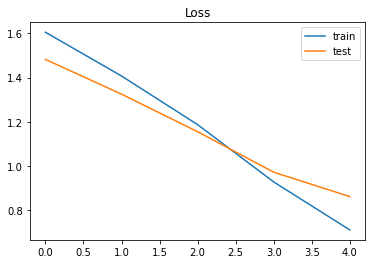

In [19]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();